In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [1]:
# Read all sheets into a dictionary of DataFrames
excel_data = pd.read_excel('occupation.xlsx', sheet_name=None)  # sheet_name=None reads all sheets
# List sheet names to identify the ones you need
print(excel_data.keys())  # This will print the names of all sheets



dict_keys(['Index', 'Table 1.1', 'Table 1.2', 'Table 1.3', 'Table 1.4', 'Table 1.5', 'Table 1.6', 'Table 1.7', 'Table 1.10', 'Table 1.11', 'Table 5.3', 'Table 5.4'])


In [14]:
table2 = excel_data['Table 1.2'][2:] # Replace 'Sheet2' with the actual sheet name

In [21]:
table2.columns = [
    'Title',                  # 2019 National Employment Matrix title
    'Code',                   # 2019 National Employment Matrix code
    'Occ_type',               # Occupation type
    'Emp_2019',               # Employment, 2019
    'Emp_2029',               # Employment, 2029
    'Emp_dist_2019_pct',      # Employment distribution, percent, 2019
    'Emp_dist_2029_pct',      # Employment distribution, percent, 2029
    'Emp_change_num',         # Employment change, numeric, 2019-29
    'Emp_change_pct',         # Employment change, percent, 2019-29
    'Occ_openings_avg'        # Occupational openings, 2019-29 annual average
]
table2 = table2.dropna()
table2

,Title,Code,Occ_type,Emp_2019,Emp_2029,Emp_dist_2019_pct,Emp_dist_2029_pct,Emp_change_num,Emp_change_pct,Occ_openings_avg
2,Management occupations,11-0000,Summary,10697.2,11202.2,6.6,6.6,505,4.7,843
3,Top executives,11-1000,Summary,2828,2946.3,1.7,1.7,118.3,4.2,222.2
4,Chief executives,11-1011,Line item,287.9,259.1,0.2,0.2,-28.7,-10,13.9
5,General and operations managers,11-1021,Line item,2486.4,2630.2,1.5,1.6,143.8,5.8,204.4
6,Legislators,11-1031,Line item,53.7,57,0,0,3.3,6.2,3.9
...,...,...,...,...,...,...,...,...,...,...
1044,"Pump operators, except wellhead pumpers",53-7072,Line item,10.5,11.5,0,0,1,9.7,1.2
1045,Wellhead pumpers,53-7073,Line item,14.1,14.7,0,0,0.6,4.2,1.5
1046,Refuse and recyclable material collectors,53-7081,Line item,133.6,145.4,0.1,0.1,11.7,8.8,18.2
1047,"Tank car, truck, and ship loaders",53-7121,Line item,12.2,12,0,0,-0.2,-1.7,1.3


In [25]:
table1.loc[:, 'Emp_change_pct'] = (table1.loc[:, 'Emp_change_num'] / table1.loc[:,'Emp_2019']) * 100
table1.loc[:, 'Emp_change_pct']

2      4.720862
3      5.281546
4     12.123589
5      2.741031
6      4.670273
7     12.460235
8      5.061396
9      4.525537
10     2.527706
11     9.126641
12    22.596743
13     2.632816
14     7.327796
15     4.934675
16     7.711522
17     -1.95423
18    -4.651287
19    -0.134336
20     4.031786
21     2.828003
22    -4.479729
23     3.417639
Name: Emp_change_pct, dtype: object

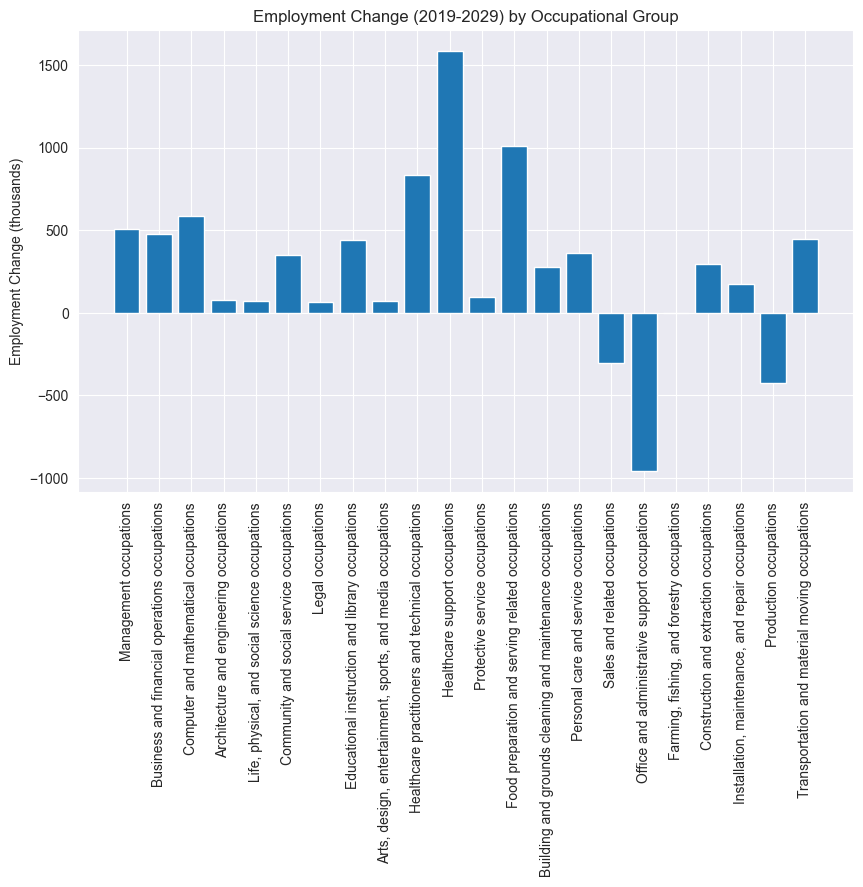

In [26]:
import matplotlib.pyplot as plt

# Visualizing the Employment change in 2029 vs 2019
plt.figure(figsize=(10, 6))
plt.bar(table1['Title'], table1['Emp_change_num'])  # Use shortened column names
plt.xticks(rotation=90)
plt.title('Employment Change (2019-2029) by Occupational Group')
plt.ylabel('Employment Change (thousands)')
plt.show()


In [34]:
# Step 4: Feature Engineering (One-hot encoding for categorical variables)
encoder = OneHotEncoder(sparse_output=False)
occupation_types_encoded = encoder.fit_transform(table2[['Occ_type']])

# Get the feature names
encoded_columns = encoder.get_feature_names_out(['Occ_type'])

# Convert the result into a DataFrame
occupation_types_df = pd.DataFrame(occupation_types_encoded, columns=encoded_columns)

# Now you can concatenate this encoded DataFrame with the original table
table2 = pd.concat([table2, occupation_types_df], axis=1)


In [37]:
table2 = table2.dropna()
table2

,Title,Code,Occ_type,Emp_2019,Emp_2029,Emp_dist_2019_pct,Emp_dist_2029_pct,Emp_change_num,Emp_change_pct,Occ_openings_avg,Occ_type_Line item,Occ_type_Summary
2,Management occupations,11-0000,Summary,10697.2,11202.2,6.6,6.6,505,4.7,843,1.0,0.0
3,Top executives,11-1000,Summary,2828,2946.3,1.7,1.7,118.3,4.2,222.2,1.0,0.0
4,Chief executives,11-1011,Line item,287.9,259.1,0.2,0.2,-28.7,-10,13.9,1.0,0.0
5,General and operations managers,11-1021,Line item,2486.4,2630.2,1.5,1.6,143.8,5.8,204.4,0.0,1.0
6,Legislators,11-1031,Line item,53.7,57,0,0,3.3,6.2,3.9,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1042,Pumping station operators,53-7070,Summary,28.3,29.8,0,0,1.5,5.4,3.1,1.0,0.0
1043,Gas compressor and gas pumping station operators,53-7071,Line item,3.7,3.6,0,0,-0.1,-2.1,0.4,1.0,0.0
1044,"Pump operators, except wellhead pumpers",53-7072,Line item,10.5,11.5,0,0,1,9.7,1.2,1.0,0.0
1045,Wellhead pumpers,53-7073,Line item,14.1,14.7,0,0,0.6,4.2,1.5,1.0,0.0


In [38]:
table2.columns

Index(['Title', 'Code', 'Occ_type', 'Emp_2019', 'Emp_2029',
       'Emp_dist_2019_pct', 'Emp_dist_2029_pct', 'Emp_change_num',
       'Emp_change_pct', 'Occ_openings_avg', 'Occ_type_Line item',
       'Occ_type_Summary'],
      dtype='object')

In [39]:
# Define the target variable (emp_change_num) and features
X = table2.drop(columns=['Emp_change_num', 'Emp_change_pct'])  # Drop the target and any unneeded features
y = table2['Emp_change_num']  # This can be changed to 'Emp_change_pct' if you're predicting percentage change

# Split data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_train.head(1)

,Title,Code,Occ_type,Emp_2019,Emp_2029,Emp_dist_2019_pct,Emp_dist_2029_pct,Occ_openings_avg,Occ_type_Line item,Occ_type_Summary
390,Oral and maxillofacial surgeons,29-1022,Line item,5.6,5.7,0,0,0.2,1.0,0.0


In [45]:
# Initialize the model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)


ValueError: could not convert string to float: 'Oral and maxillofacial surgeons'

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")